## NAME - HARSHITA S 

#### Task 2 - To Explore Supervised Machine Learning by predicting the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the data from the remote link provided
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## EDA (Exploratory Data Analysis)

In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


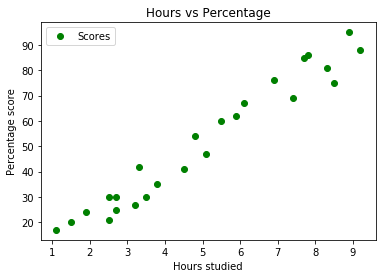

In [10]:
#To plot the data points using Scatterplot
df.plot(x='Hours', y='Scores', style='o', c='green')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

We can observe that there is a positive linear relationship between the number of hours studied and percentage of score

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

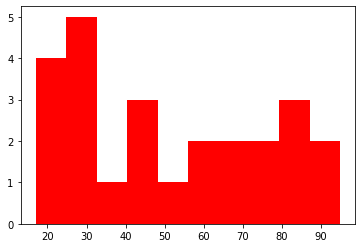

In [22]:
plt.hist(df['Scores'],color = 'red')

From the above histogram, we can observe that most students score between 25%-30%

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

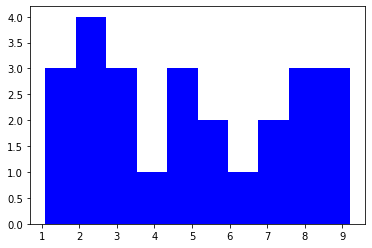

In [23]:
plt.hist(df['Hours'], color='blue')

From the above histogram, we can observe that most students study for 2-3 hours

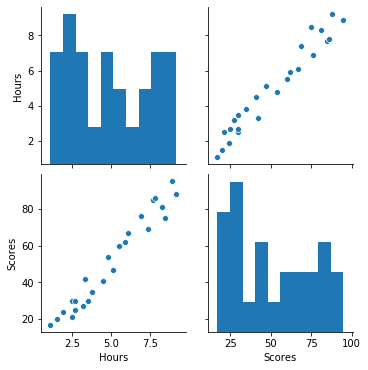

In [12]:
sns.pairplot(df)

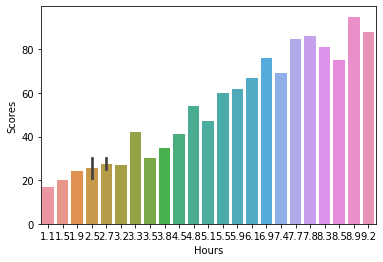

In [13]:
sns.barplot(x='Hours',y='Scores',data=df)

In [15]:
print("Average percentage score =",df['Scores'].mean())

Average percentage score = 51.48


In [16]:
print("Average studying hours =",df['Hours'].mean())

Average studying hours = 5.012


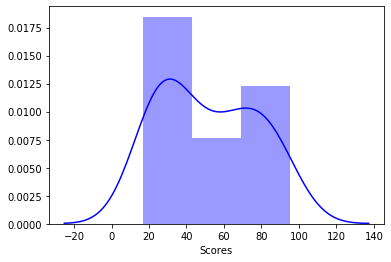

In [17]:
sns.distplot(df['Scores'], color='blue')

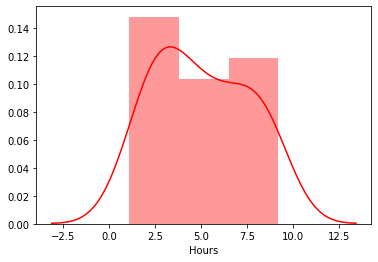

In [18]:
sns.distplot(df['Hours'], color='red')

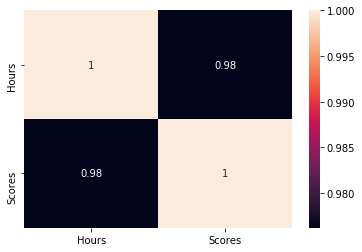

In [25]:
sns.heatmap(df.corr(), annot=True)

## Preparing the data

In [27]:
#Dividing the data into attributes and labels
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [28]:
#Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(7, 1)
(18,)
(7,)


#### Feature Scaling

In [30]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Training the model 

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the result

In [32]:
y_pred = reg.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

#### Evaluating the model

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502485


#### Plotting the results

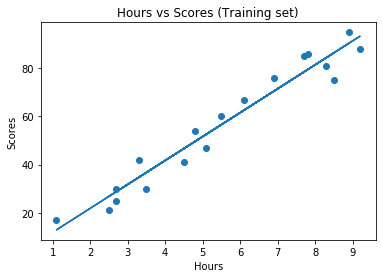

In [34]:
plt.scatter(X_train_copy, y_train)
plt.plot(X_train_copy, reg.predict(X_train))
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

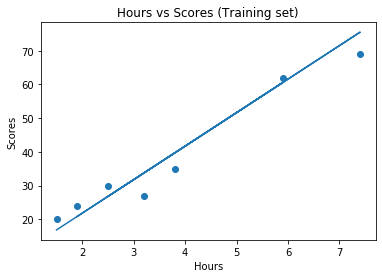

In [36]:
plt.scatter(X_test_copy, y_test)
plt.plot(X_test_copy, y_pred)
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Comapring actual vs predicted values

In [37]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [39]:
#For hours=9.25
given_hour=9.25
pred1 = reg.predict(sc.transform([[given_hour]]))
print("No of Hours = {}".format(given_hour))
print("Predicted Score = {}".format(pred1[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652
